**<h1> SMS SPAM CLASSIFIER</h1>**

**<h2>Feature Engineering and Modelling</h2>**

In [6]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score, recall_score ,f1_score , confusion_matrix
from sklearn.naive_bayes import GaussianNB 


<h3> Modelling on Data before preprocessing(without text features) </h3>

In [ ]:
# reading before preprocessing dataset
before_pre_data = pd.read_csv("before_preprocessing.csv")

In [ ]:
before_pre_data.head()

,target,text,length,word_count,sentence_count,digits_count,uppercase_words_count,unique_words_count,average_word_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,0,20,4.625000
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,6,3.625000
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25,2,24,4.189189
3,0,U dun say so early hor... U c already then say...,49,13,1,0,2,10,3.769231
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,1,12,4.066667


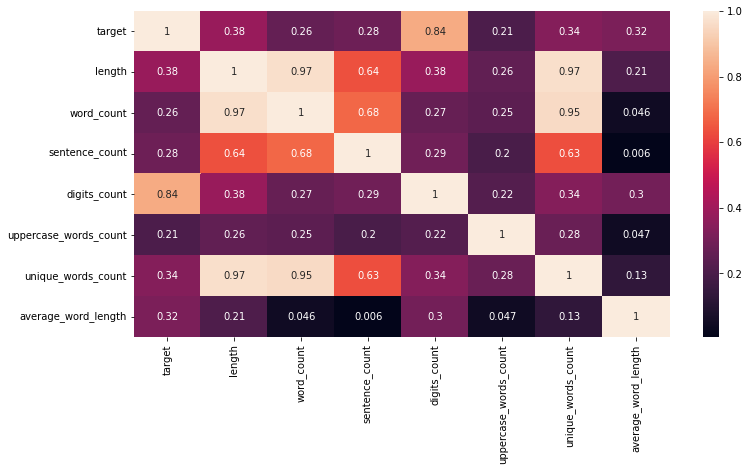

In [ ]:
# checking correlation betweeen features
plt.figure(figsize=(12,6))
sns.heatmap(data=before_pre_data.corr(),annot= True)
plt.show()

* Here word count and unique word count is higly correlated feature with length feature so wee will drop these features and will only keep length features.

* So we will keep only length , sentence count , digits count count uppercase word count and average word length features.

* We will not use text features.

In [ ]:
# keeping only useful features
data_before_pre = pd.DataFrame(before_pre_data, columns=['length','digits_count','sentence_count','uppercase_words_count','average_word_length','target'])
data_before_pre.head()

,length,digits_count,sentence_count,uppercase_words_count,average_word_length,target
0,111,0,2,0,4.625000,0
1,29,0,2,0,3.625000,0
2,155,25,2,2,4.189189,1
3,49,0,1,2,3.769231,0
4,61,0,1,1,4.066667,0


In [ ]:
# Seperating Class label and Independent Features
X = data_before_pre.iloc[:,:-1]
y = data_before_pre['target'].values

In [ ]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify = y)

Modelling

Train Accuracy :  0.8858524788391777
Test Accuracy :  0.8965183752417795
Train Precision :  0.5266524520255863
Test Precision :  0.5517241379310345
Train F1-score :  0.6767123287671233
Test F1-score :  0.7052341597796142


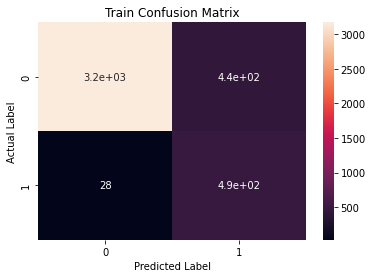

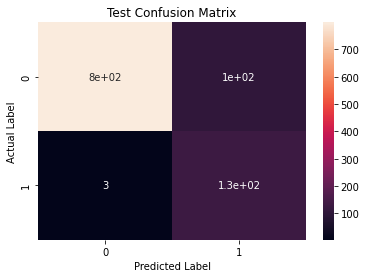

In [ ]:
# linear model(logistic regression)
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train,y_train)
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9675937122128174
Test Accuracy :  0.9671179883945842
Train Precision :  0.8592592592592593
Test Precision :  0.8540145985401459
Train F1-score :  0.8738229755178908
Test F1-score :  0.873134328358209


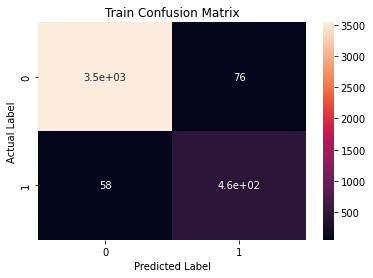

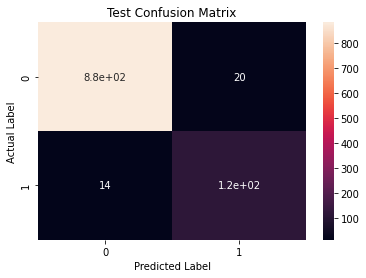

In [ ]:
# Gaussian Naive bayes
gnb =   GaussianNB()
gnb.fit(X_train,y_train)
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.966142684401451
Test Accuracy :  0.9671179883945842
Train Precision :  0.9727722772277227
Test Precision :  0.9619047619047619
Train F1-score :  0.8488120950323973
Test F1-score :  0.8559322033898304


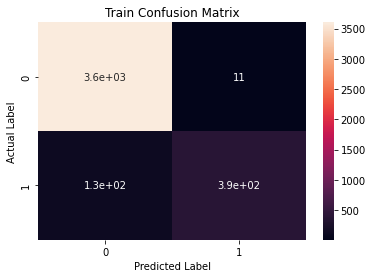

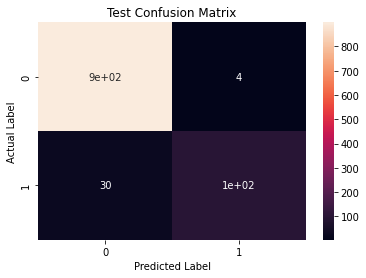

In [ ]:
# Support Vector Machine
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "hinge")
sgd.fit(X_train,y_train)
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9775090689238211
test_Accuracy :  0.9748549323017408
Train Precision :  0.9612903225806452
Test Precision :  0.9487179487179487
Train F1-score : 0.905775075987842
Test F1-score : 0.8951612903225806


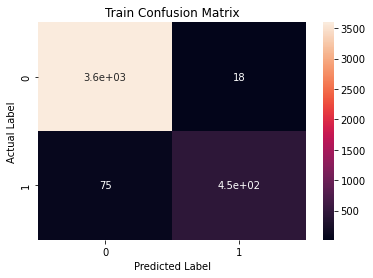

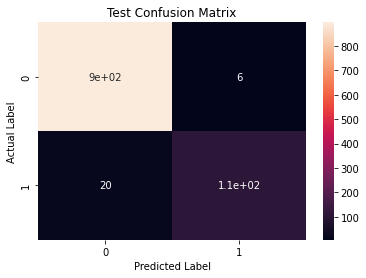

In [ ]:
# K- Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.999758162031439
test_Accuracy :  0.9854932301740812
Train Precision :  1.0
Test Precision :  0.9754098360655737
Train F1-score : 0.9990412272291467
Test F1-score : 0.9407114624505928


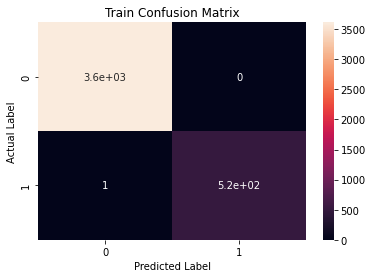

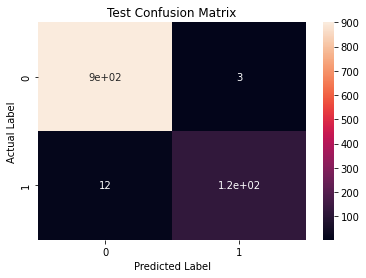

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:

from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Data", "Classifier", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision","Train F1-score", "Test F1-score"])
  
# Add rows
myTable.add_row(["Before preprocessing(without text feature)","SGD - log losss" ,"0.9661", "0.9709", "0.8485", "0.8740","0.8691","0.8872"])
myTable.add_row(["Before preprocessing(without text feature)","Gaussian Naive Bayes","0.9675", "0.9671", "0.8592","0.8540","0.8738","0.8731"])
myTable.add_row(["Before preprocessing(without text feature)", "SVM", "0.9678", "0.9690","0.9642","0.9626","0.8586","0.8655"])
myTable.add_row(["Before preprocessing(without text feature)", "KNN", "0.9775", "0.9748","0.9612","0.9487","0.9057","0.8951"])
myTable.add_row(["Before preprocessing(without text feature)", "Random Forest", "0.9997", "0.9854","1","0.9754","0.9990","0.9407"])
print(myTable)

+--------------------------------------------+----------------------+----------------+---------------+-----------------+----------------+----------------+---------------+
|                    Data                    |      Classifier      | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train F1-score | Test F1-score |
+--------------------------------------------+----------------------+----------------+---------------+-----------------+----------------+----------------+---------------+
| Before preprocessing(without text feature) |   SGD - log losss    |     0.9661     |     0.9709    |      0.8485     |     0.8740     |     0.8691     |     0.8872    |
| Before preprocessing(without text feature) | Gaussian Naive Bayes |     0.9675     |     0.9671    |      0.8592     |     0.8540     |     0.8738     |     0.8731    |
| Before preprocessing(without text feature) |         SVM          |     0.9678     |     0.9690    |      0.9642     |     0.9626     |     0.8

Before data preprocessing and with numericals featurs only Radom Forest performs better than all the models

<h3> Modelling Preprocessed Data (without Text features)</h3>

In [ ]:
# reading data
pre_data = pd.read_csv("preprocessed_data.csv")
pre_data.head()

,preprocessed_text,length,word_count,sentence_count,unique_words_count,average_word_length,target
0,go jurong point crazi avail bugi n great world...,77,16,1,16,4.812500,0
1,ok lar joke wif u oni,22,6,1,6,3.666667,0
2,free entri wkli comp win fa cup final tkt st m...,104,22,1,20,4.727273,1
3,u dun say earli hor u c alreadi say,36,9,1,7,4.000000,0
4,nah think goe usf live around though,36,7,1,7,5.142857,0


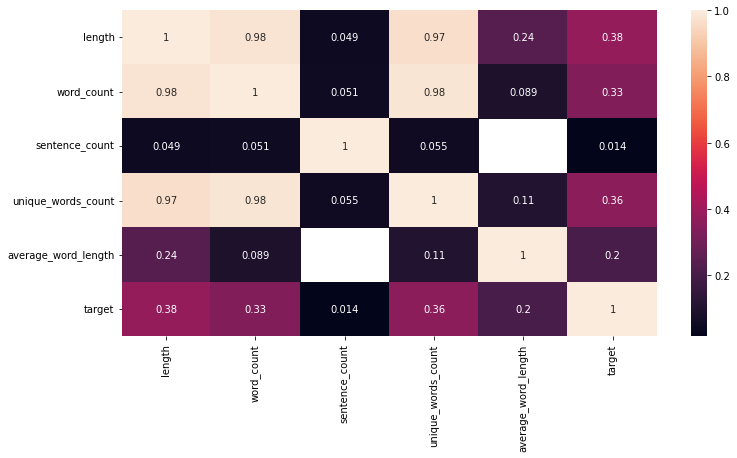

In [ ]:
# checking correlation betweeen features
plt.figure(figsize=(12,6))
sns.heatmap(data=pre_data.corr(),annot= True)
plt.show()

Length feature is highly correlated with word count and unique word count feature so we will keep only length feature out of these three feature.

So we will use length , sentence count and average word length feature.

In [ ]:
#Keeping only useful features
data_after_pre = pd.DataFrame(before_pre_data, columns=['length','sentence_count','average_word_length','target'])
data_after_pre.head()

,length,sentence_count,average_word_length,target
0,111,2,4.625000,0
1,29,2,3.625000,0
2,155,2,4.189189,1
3,49,1,3.769231,0
4,61,1,4.066667,0


In [ ]:
# seperating class label and independent features
X = data_before_pre.iloc[:,:-1]
y = data_before_pre['target'].values

In [ ]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify = y)

Train Accuracy :  0.9704957678355501
Test Accuracy :  0.971953578336557
Train Precision :  0.9504504504504504
Test Precision :  0.9473684210526315
Train F1-score :  0.8737060041407868
Test F1-score :  0.8816326530612245


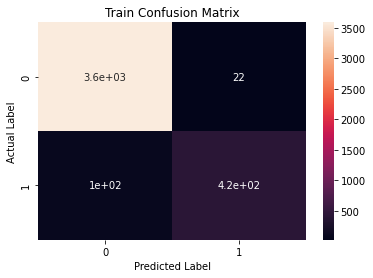

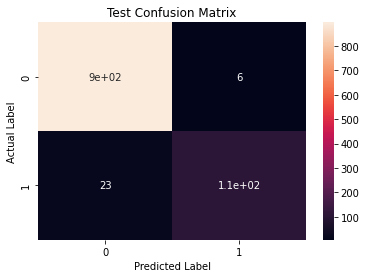

In [ ]:
# linear model(logistic regression)
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train,y_train)
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9675937122128174
Test Accuracy :  0.9671179883945842
Train Precision :  0.8592592592592593
Test Precision :  0.8540145985401459
Train F1-score :  0.8738229755178908
Test F1-score :  0.873134328358209


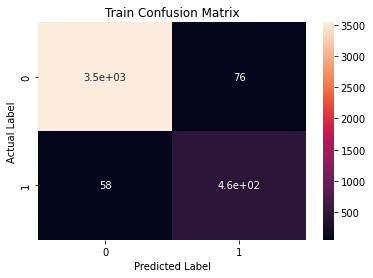

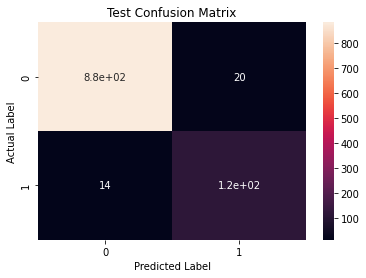

In [ ]:
# Gaussian Naive bayes
gnb =   GaussianNB()
gnb.fit(X_train,y_train)
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9615477629987909
Test Accuracy :  0.9690522243713733
Train Precision :  0.8156521739130435
Test Precision :  0.8561151079136691
Train F1-score :  0.8550592525068369
Test F1-score :  0.8814814814814815


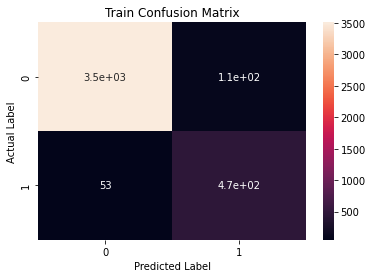

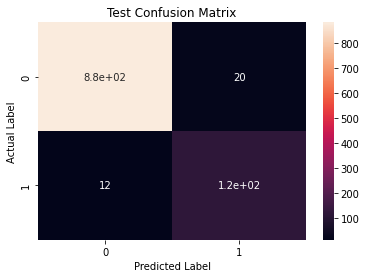

In [ ]:
# Support Vector Machine
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "hinge")
sgd.fit(X_train,y_train)
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9775090689238211
test_Accuracy :  0.9748549323017408
Train Precision :  0.9612903225806452
Test Precision :  0.9487179487179487
Train F1-score : 0.905775075987842
Test F1-score : 0.8951612903225806


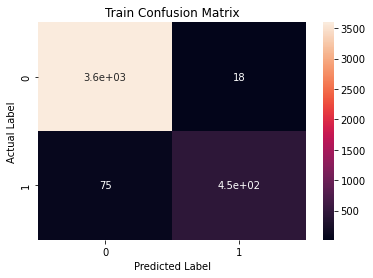

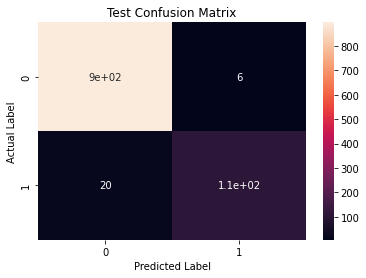

In [ ]:
# K- Nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.999758162031439
test_Accuracy :  0.9854932301740812
Train Precision :  0.9980879541108987
Test Precision :  0.9754098360655737
Train F1-score : 0.999043062200957
Test F1-score : 0.9407114624505928


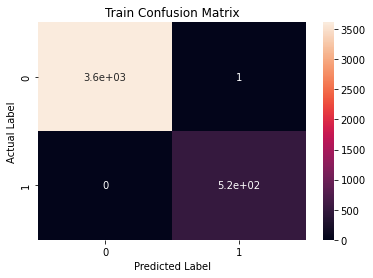

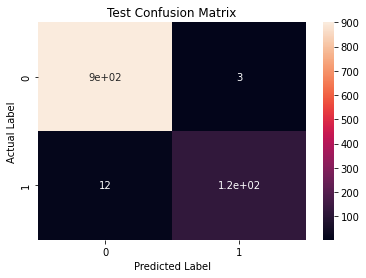

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Data", "Classifier", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision","Train F1-score", "Test F1-score"])
  
# Add rows
myTable.add_row(["After preprocessing(without text feature)","SGD - log losss" ,"0.97001", "0.9719", "0.9522", "0.9473","0.8711","0.8816"])
myTable.add_row(["After preprocessing(without text feature)","Gaussian Naive Bayes","0.9675", "0.9671", "0.8592","0.8540","0.8738","0.8731"])
myTable.add_row(["After preprocessing(without text feature)", "SVM", "0.9690", "0.9738","0.8908","0.9262","0.8752","0.8932"])
myTable.add_row(["After preprocessing(without text feature)", "KNN", "0.9775", "0.9748","0.9612","0.9487","0.9057","0.8951"])
myTable.add_row(["After preprocessing(without text feature)", "Random Forest", "0.9997", "0.9854","1","0.9752","0.9990","0.9365"])
print(myTable)

+-------------------------------------------+----------------------+----------------+---------------+-----------------+----------------+----------------+---------------+
|                    Data                   |      Classifier      | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train F1-score | Test F1-score |
+-------------------------------------------+----------------------+----------------+---------------+-----------------+----------------+----------------+---------------+
| After preprocessing(without text feature) |   SGD - log losss    |    0.97001     |     0.9719    |      0.9522     |     0.9473     |     0.8711     |     0.8816    |
| After preprocessing(without text feature) | Gaussian Naive Bayes |     0.9675     |     0.9671    |      0.8592     |     0.8540     |     0.8738     |     0.8731    |
| After preprocessing(without text feature) |         SVM          |     0.9690     |     0.9738    |      0.8908     |     0.9262     |     0.8752   

There is no big change on model perfomance before preprocessing data and after preprocessing data.

<h3> Modelling on Final Dataset </h3>


In [26]:
# reading  final dataset
data = pd.read_csv("Final_data.csv")
data.head()

,Unnamed: 0,target,text,length,word_count,sentence_count,digits_count,uppercase_words_count,unique_words_count,average_word_length,preprocessed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,0,20,4.625000,go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,6,3.625000,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25,2,24,4.189189,free entri wkli comp win fa cup final tkt st m...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,0,2,10,3.769231,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,1,12,4.066667,nah think goe usf live around though


In [27]:
# Loading Preprocessed data
data2 = pd.read_csv("preprocessed_data.csv")
data2.head()

,preprocessed_text,length,word_count,sentence_count,unique_words_count,average_word_length,target
0,go jurong point crazi avail bugi n great world...,77,16,1,16,4.812500,0
1,ok lar joke wif u oni,22,6,1,6,3.666667,0
2,free entri wkli comp win fa cup final tkt st m...,104,22,1,20,4.727273,1
3,u dun say earli hor u c alreadi say,36,9,1,7,4.000000,0
4,nah think goe usf live around though,36,7,1,7,5.142857,0


In [28]:
# Adding preprocessed length column to final data
data['preprocessed_length'] = data2['length']

In [29]:
# Seperating Class label and Depe
X = data.iloc[:,2:]
X

,text,length,word_count,sentence_count,digits_count,uppercase_words_count,unique_words_count,average_word_length,preprocessed_text,preprocessed_length
0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,0,20,4.625000,go jurong point crazi avail bugi n great world...,77
1,Ok lar... Joking wif u oni...,29,8,2,0,0,6,3.625000,ok lar joke wif u oni,22
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25,2,24,4.189189,free entri wkli comp win fa cup final tkt st m...,104
3,U dun say so early hor... U c already then say...,49,13,1,0,2,10,3.769231,u dun say earli hor u c alreadi say,36
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,1,12,4.066667,nah think goe usf live around though,36
...,...,...,...,...,...,...,...,...,...,...
5164,This is the 2nd time we have tried 2 contact u...,161,35,4,21,2,26,4.600000,nd time tri contact u u pound prize claim easi...,79
5165,Will Ì_ b going to esplanade fr home?,37,9,1,0,1,8,4.111111,b go esplanad fr home,22
5166,"Pity, * was in mood for that. So...any other s...",57,15,2,0,0,10,3.800000,piti mood suggest,17
5167,The guy did some bitching but I acted like i'd...,125,27,1,0,1,26,4.629630,guy bitch act like would interest buy someth e...,71


In [30]:
y = data['target'].values

Train test split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify = y)

In [32]:
print(X_train.shape)
print(X_test.shape)

(4135, 10)
(1034, 10)


Feature Extraction from text data : Bag of Words

In [33]:
cv = CountVectorizer(decode_error='replace',encoding='utf-8')
bow = cv.fit(X_train['preprocessed_text'].values.astype('U'))
X_train_bow = bow.transform(X_train['preprocessed_text'].values.astype('U'))
X_test_bow = bow.transform(X_test['preprocessed_text'].values.astype('U'))

In [34]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(4135, 5894)
(1034, 5894)


Feature Extraction from text data: Bag of words(ngram_range = (1,2))

In [35]:
# BOW (Bigrams)
cv_2 = CountVectorizer(ngram_range = (1,2))
bow_2 = cv_2.fit(X_train['preprocessed_text'].values.astype('U'))
X_train_bow_2 = bow_2.transform(X_train['preprocessed_text'].values.astype('U'))
X_test_bow_2 = bow_2.transform(X_test['preprocessed_text'].values.astype('U'))

In [36]:
print(X_train_bow_2.shape)
print(X_test_bow_2.shape)

(4135, 30039)
(1034, 30039)


Feature Extraction from text data : TFIDF Vectorizer

In [37]:
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit(X_train['preprocessed_text'].values.astype('U'))
X_train_tfidf = tfidf_vec.transform(X_train['preprocessed_text'].values.astype('U'))
X_test_tfidf = tfidf_vec.transform(X_test['preprocessed_text'].values.astype('U'))

In [38]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(4135, 5894)
(1034, 5894)


Feature Sets

In [39]:
# Bag of Words + length after preprocessing + Digits Count(before preprocesing)
X_train_BOW = hstack([X_train_bow,X_train['preprocessed_length'].values.reshape(-1,1),X_train['digits_count'].values.reshape(-1,1)]).toarray()
X_test_BOW = hstack([X_test_bow,X_test['preprocessed_length'].values.reshape(-1,1),X_test['digits_count'].values.reshape(-1,1)]).toarray()
print(X_train_BOW.shape)
print(X_test_BOW.shape)

(4135, 5896)
(1034, 5896)


In [40]:
# Bag of Words(ngram_range = (1,2)) + length after preprocessing + Digits Count(before preprocesing)
X_train_BOW_2= hstack([X_train_bow_2,X_train['preprocessed_length'].values.reshape(-1,1),X_train['digits_count'].values.reshape(-1,1)]).toarray()
X_test_BOW_2 = hstack([X_test_bow_2,X_test['preprocessed_length'].values.reshape(-1,1),X_test['digits_count'].values.reshape(-1,1)]).toarray()
print(X_train_BOW_2.shape)
print(X_test_BOW_2.shape)

(4135, 30041)
(1034, 30041)


In [41]:
# Tfidf + length after preprocessing + Digits Count(before preprocesing)
X_train_TFIDF= hstack([X_train_tfidf,X_train['preprocessed_length'].values.reshape(-1,1),X_train['digits_count'].values.reshape(-1,1)]).toarray()
X_test_TFIDF = hstack([X_test_tfidf,X_test['preprocessed_length'].values.reshape(-1,1),X_test['digits_count'].values.reshape(-1,1)]).toarray()
print(X_train_TFIDF.shape)
print(X_test_TFIDF.shape)

(4135, 5896)
(1034, 5896)


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

Train Accuracy :  0.9315598548972188
Test Accuracy :  0.8820116054158608
Train Precision :  0.6484472049689441
Test Precision :  0.5198237885462555
Train F1-score :  0.7867370007535796
Test F1-score :  0.659217877094972


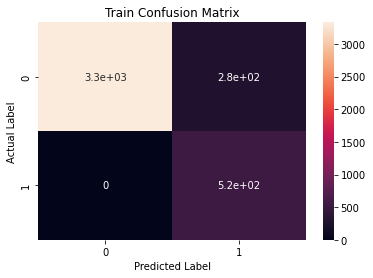

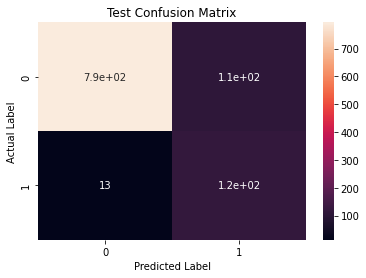

In [ ]:
# Gaussian navie bayes + Bow
gnb = GaussianNB()
gnb.fit(X_train_BOW,y_train)
y_train_pred = gnb.predict(X_train_BOW)
y_test_pred = gnb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9859733978234583
Test Accuracy :  0.9284332688588007
Train Precision :  0.9
Test Precision :  0.6461538461538462
Train F1-score :  0.9473684210526316
Test F1-score :  0.7730061349693252


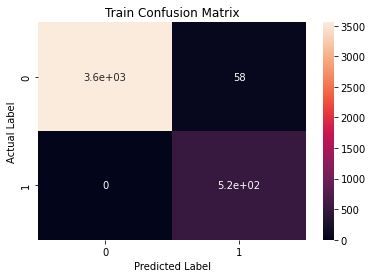

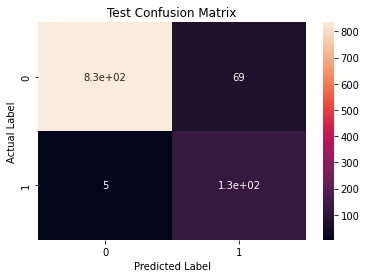

In [ ]:
# Gaussian Naive Bayes + Bow(ngram range = (1,2))
gnb = GaussianNB()
gnb.fit(X_train_BOW_2,y_train)
y_train_pred = gnb.predict(X_train_BOW_2)
y_test_pred = gnb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9339782345828295
Test Accuracy :  0.8839458413926499
Train Precision :  0.6566037735849056
Test Precision :  0.5246636771300448
Train F1-score :  0.7927107061503417
Test F1-score :  0.6610169491525423


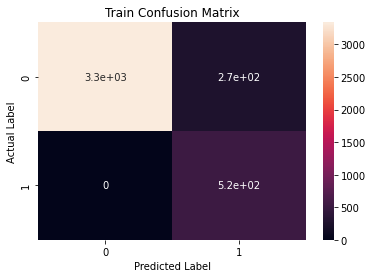

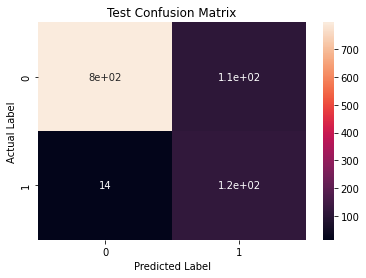

In [ ]:
# Gaussian Naive Bayes + Tfidf
gnb = GaussianNB()
gnb.fit(X_train_TFIDF,y_train)
y_train_pred = gnb.predict(X_train_TFIDF)
y_test_pred = gnb.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9862152357920193
Test Accuracy :  0.9845261121856866
Train Precision :  0.9567779960707269
Test Precision :  0.9457364341085271
Train F1-score :  0.9447138700290979
Test F1-score :  0.9384615384615385


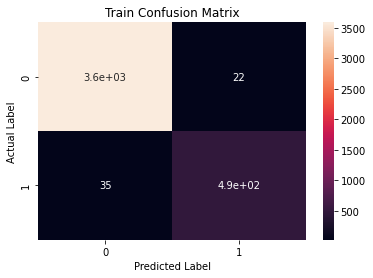

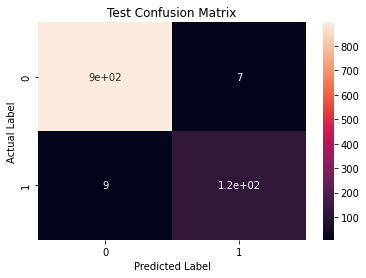

In [ ]:
# Multinomial Naive Bayes + Bow
mnb = MultinomialNB()
mnb.fit(X_train_BOW,y_train)
y_train_pred = mnb.predict(X_train_BOW)
y_test_pred = mnb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9912938331318016
Test Accuracy :  0.9806576402321083
Train Precision :  0.9821428571428571
Test Precision :  0.9586776859504132
Train F1-score :  0.9649122807017544
Test F1-score :  0.9206349206349207


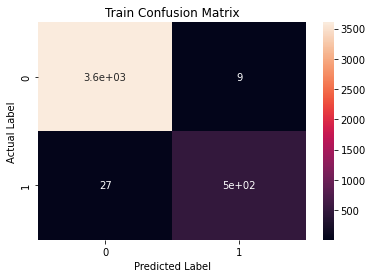

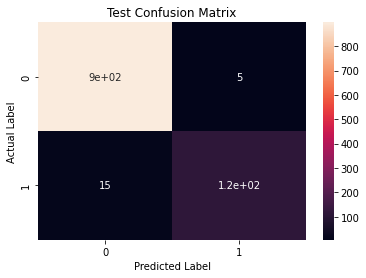

In [ ]:
# Multinomial Naive Bayes + BOW (ngram_range = (1,2))
mnb = MultinomialNB()
mnb.fit(X_train_BOW_2,y_train)
y_train_pred = mnb.predict(X_train_BOW_2)
y_test_pred = mnb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9685610640870617
Test Accuracy :  0.9748549323017408
Train Precision :  0.9100418410041841
Test Precision :  0.9411764705882353
Train F1-score :  0.87
Test F1-score :  0.896


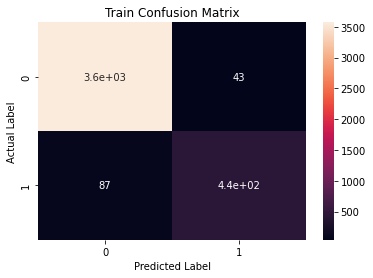

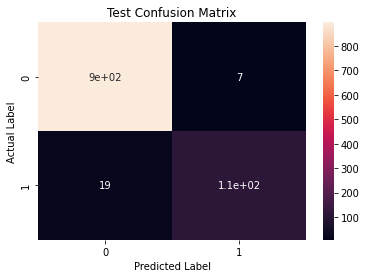

In [ ]:
# Multinomial Naive Bayes + TFIDF
mnb = MultinomialNB()
mnb.fit(X_train_TFIDF,y_train)
y_train_pred = mnb.predict(X_train_TFIDF)
y_test_pred = mnb.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9828295042321644
Test Accuracy :  0.9806576402321083
Train Precision :  0.9870410367170627
Test Precision :  1.0
Train F1-score :  0.9279187817258884
Test F1-score :  0.9173553719008264


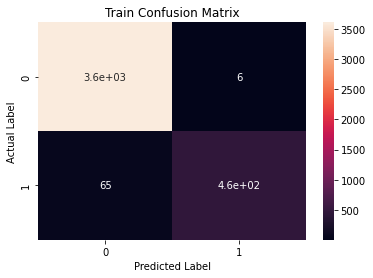

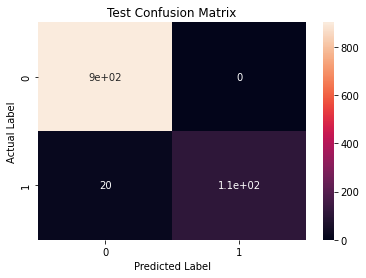

In [ ]:
# Bernoulli Naive Bayes + Bow
bnb = BernoulliNB()
bnb.fit(X_train_BOW,y_train)
y_train_pred = bnb.predict(X_train_BOW)
y_test_pred = bnb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9567110036275696
Test Accuracy :  0.9245647969052224
Train Precision :  0.9803921568627451
Test Precision :  1.0
Train F1-score :  0.7963594994311718
Test F1-score :  0.5760869565217391


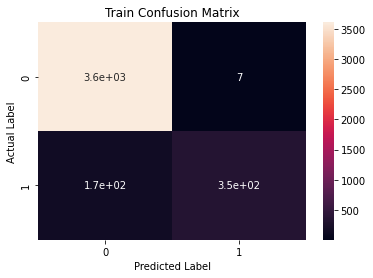

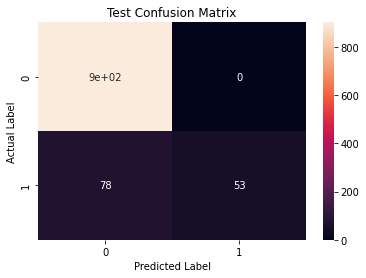

In [ ]:
# Bernoulli Naive Bayes + BOW(ngram_range = (1,2))
bnb = BernoulliNB()
bnb.fit(X_train_BOW_2,y_train)
y_train_pred = bnb.predict(X_train_BOW_2)
y_test_pred = bnb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9828295042321644
Test Accuracy :  0.9806576402321083
Train Precision :  0.9870410367170627
Test Precision :  1.0
Train F1-score :  0.9279187817258884
Test F1-score :  0.9173553719008264


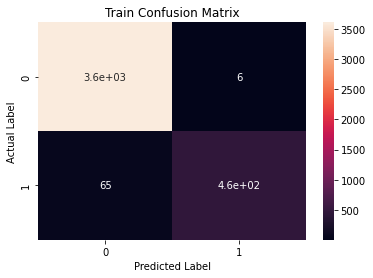

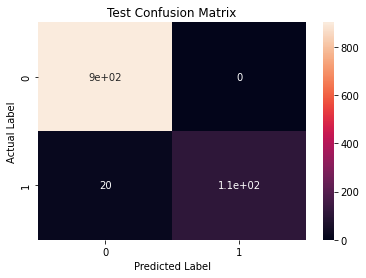

In [ ]:
# Bernoulli Naive Bayes + TFIDF
bnb = BernoulliNB()
bnb.fit(X_train_TFIDF,y_train)
y_train_pred = bnb.predict(X_train_TFIDF)
y_test_pred = bnb.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Logistic Regression

Train Accuracy :  0.9552599758162031
Test Accuracy :  0.9574468085106383
Train Precision :  0.9884057971014493
Test Precision :  0.978021978021978
Train F1-score :  0.7866205305651671
Test F1-score :  0.8018018018018017


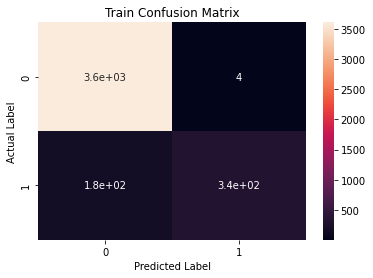

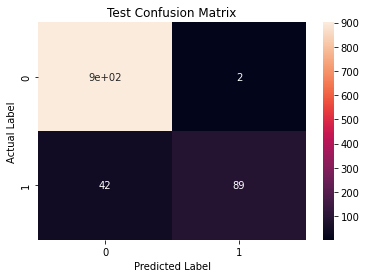

In [ ]:
# Logistic Regression + BOW
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train_BOW,y_train)
y_train_pred = sgd.predict(X_train_BOW)
y_test_pred = sgd.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9748488512696494
Test Accuracy :  0.9738878143133463
Train Precision :  0.9644444444444444
Test Precision :  0.956140350877193
Train F1-score :  0.8930041152263374
Test F1-score :  0.889795918367347


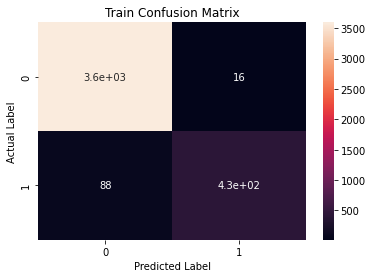

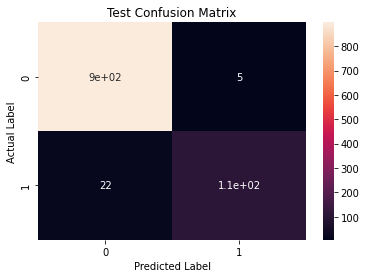

In [ ]:
# logistic regression + BOW(ngram_range = (1,2))
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train_BOW_2,y_train)
y_train_pred = sgd.predict(X_train_BOW_2)
y_test_pred = sgd.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9579201934703748
Test Accuracy :  0.9593810444874274
Train Precision :  0.793918918918919
Test Precision :  0.7870967741935484
Train F1-score :  0.8438061041292639
Test F1-score :  0.8531468531468531


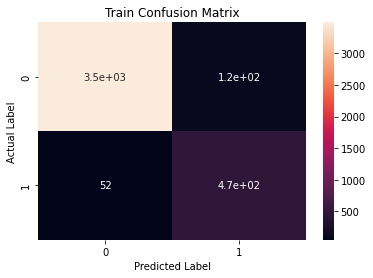

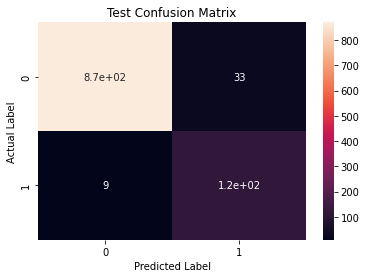

In [ ]:
# logisti  regression + Tfidf
from sklearn.linear_model import SGDClassifier
sgd =   SGDClassifier(loss = "log")
sgd.fit(X_train_TFIDF,y_train)
y_train_pred = sgd.predict(X_train_TFIDF)
y_test_pred = sgd.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Support Vector Machine

Train Accuracy :  0.9615477629987909
Test Accuracy :  0.9661508704061895
Train Precision :  0.9892183288409704
Test Precision :  0.9897959183673469
Train F1-score :  0.8219484882418813
Test F1-score :  0.8471615720524018


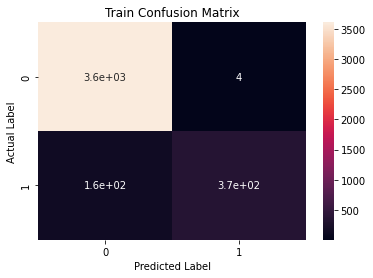

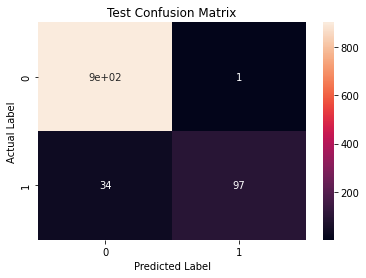

In [ ]:
#Svm + Bow
from sklearn.svm import SVC
svm = SVC(C=0.1)
svm.fit(X_train_BOW,y_train)
y_train_pred = svm.predict(X_train_BOW)
y_test_pred = svm.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9615477629987909
Test Accuracy :  0.9661508704061895
Train Precision :  0.9892183288409704
Test Precision :  0.9897959183673469
Train F1-score :  0.8219484882418813
Test F1-score :  0.8471615720524018


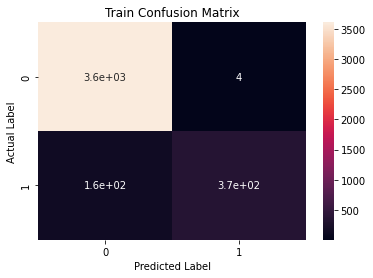

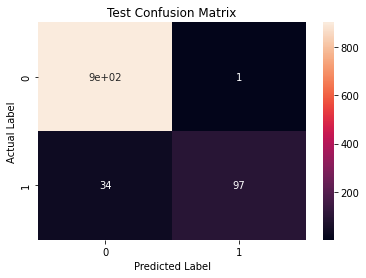

In [ ]:
#svm +bow(ngram range = (1,2))
svm = SVC(C=0.1)
svm.fit(X_train_BOW_2,y_train)
y_train_pred = svm.predict(X_train_BOW_2)
y_test_pred = svm.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9613059250302297
Test Accuracy :  0.9661508704061895
Train Precision :  0.9865591397849462
Test Precision :  0.9897959183673469
Train F1-score :  0.8210290827740492
Test F1-score :  0.8471615720524018


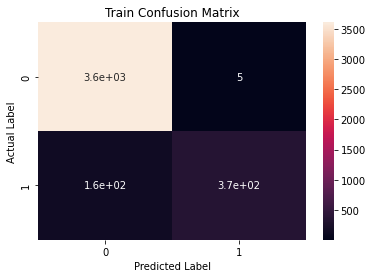

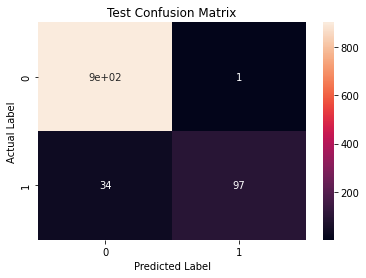

In [ ]:
#svm + TFIDF
svm = SVC(C=0.1)
svm.fit(X_train_TFIDF,y_train)
y_train_pred = svm.predict(X_train_TFIDF)
y_test_pred = svm.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score : ",f1_score(y_train , y_train_pred))
print("Test F1-score : ",f1_score(y_test , y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm, annot=True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot=True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

K-Nearest Neighbors

Train Accuracy :  0.9782345828295043
test_Accuracy :  0.9787234042553191
Train Precision :  0.9556962025316456
Test Precision :  0.943089430894309
Train F1-score : 0.9096385542168675
Test F1-score : 0.9133858267716536


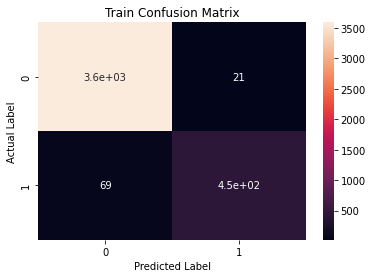

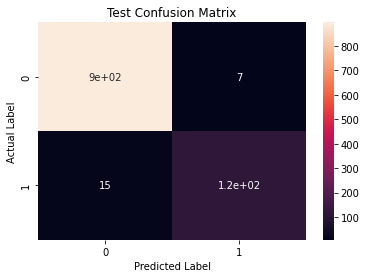

In [ ]:
# KNN + BOW
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_BOW,y_train)
y_train_pred = knn.predict(X_train_BOW)
y_test_pred = knn.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9792019347037485
test_Accuracy :  0.9796905222437138
Train Precision :  0.9560669456066946
Test Precision :  0.9365079365079365
Train F1-score : 0.9139999999999999
Test F1-score : 0.9182879377431906


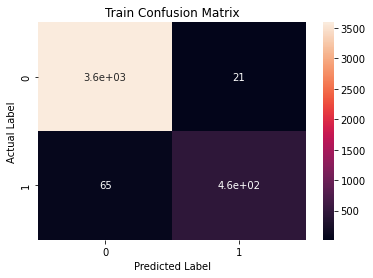

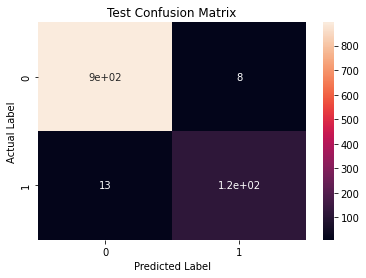

In [ ]:
# KNN + BOW(ngram range = (1,2))
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_BOW_2,y_train)
y_train_pred = knn.predict(X_train_BOW_2)
y_test_pred = knn.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.9779927448609431
test_Accuracy :  0.9748549323017408
Train Precision :  0.961456102783726
Test Precision :  0.9411764705882353
Train F1-score : 0.9079878665318504
Test F1-score : 0.896


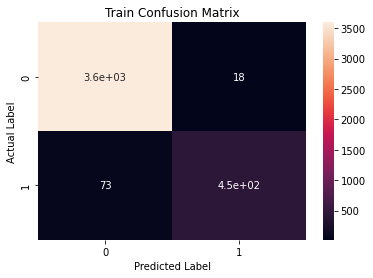

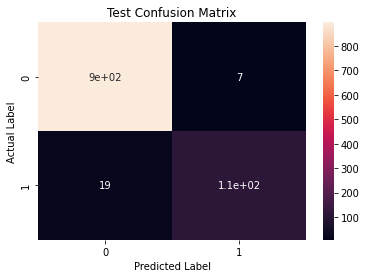

In [ ]:
# KNN + TFIDF
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_TFIDF,y_train)
y_train_pred = knn.predict(X_train_TFIDF)
y_test_pred = knn.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Random Forest

Train Accuracy :  1.0
test_Accuracy :  0.9893617021276596
Train Precision :  1.0
Test Precision :  0.9838709677419355
Train F1-score : 1.0
Test F1-score : 0.9568627450980393


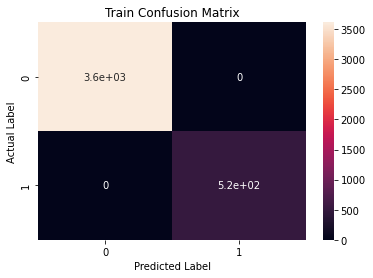

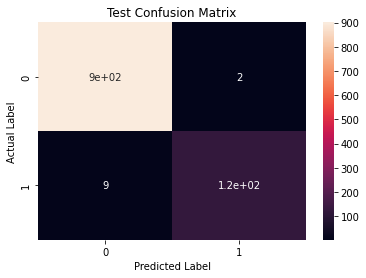

In [ ]:
#random forest + BOW
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_BOW , y_train)
y_train_pred = rfc.predict(X_train_BOW)
y_test_pred = rfc.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  1.0
test_Accuracy :  0.9874274661508704
Train Precision :  1.0
Test Precision :  0.9916666666666667
Train F1-score : 1.0
Test F1-score : 0.9482071713147411


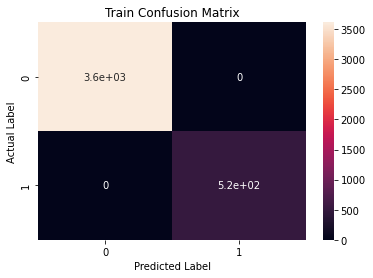

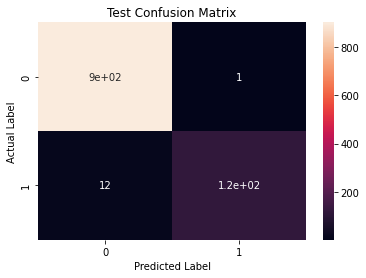

In [ ]:
#random forest + BOW(ngram range = (1,2))
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_BOW_2 , y_train)
y_train_pred = rfc.predict(X_train_BOW_2)
y_test_pred = rfc.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  1.0
test_Accuracy :  0.9864603481624759
Train Precision :  1.0
Test Precision :  0.9834710743801653
Train F1-score : 1.0
Test F1-score : 0.9444444444444445


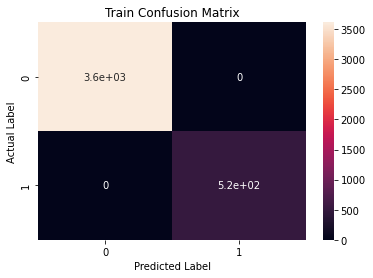

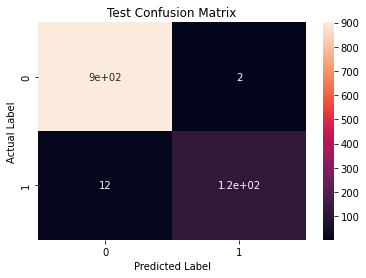

In [ ]:
#random forest + TFIDF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_TFIDF , y_train)
y_train_pred = rfc.predict(X_train_TFIDF)
y_test_pred = rfc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

XGboost

Train Accuracy :  0.985006045949214
test_Accuracy :  0.9854932301740812
Train Precision :  0.9831932773109243
Test Precision :  0.9754098360655737
Train F1-score : 0.937875751503006
Test F1-score : 0.9407114624505928


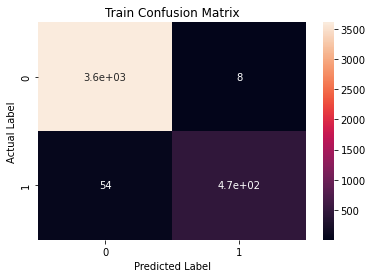

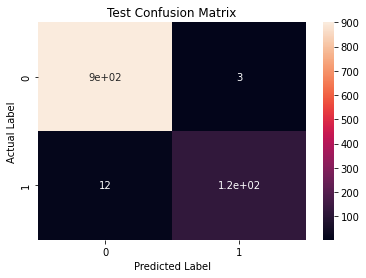

In [ ]:
# XGB + BOW
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_BOW , y_train)
y_train_pred = xgb.predict(X_train_BOW)
y_test_pred = xgb.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  0.985006045949214
test_Accuracy :  0.9854932301740812
Train Precision :  0.9831932773109243
Test Precision :  0.9754098360655737
Train F1-score : 0.937875751503006
Test F1-score : 0.9407114624505928


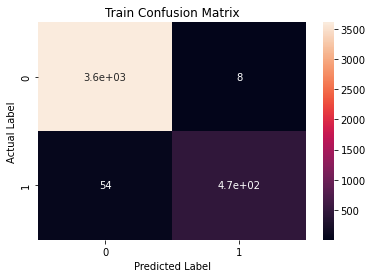

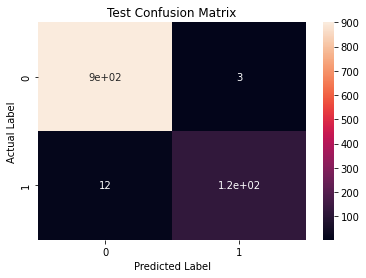

In [ ]:
# XGB + BOW(ngram_range = (1,2))
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_BOW_2 , y_train)
y_train_pred = xgb.predict(X_train_BOW_2)
y_test_pred = xgb.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  1.0
test_Accuracy :  0.9864603481624759
Train Precision :  1.0
Test Precision :  0.9834710743801653
Train F1-score : 1.0
Test F1-score : 0.9444444444444445


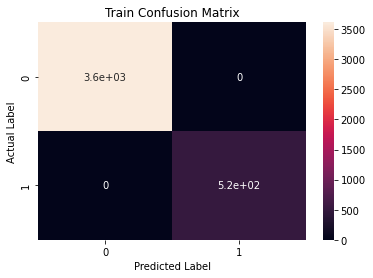

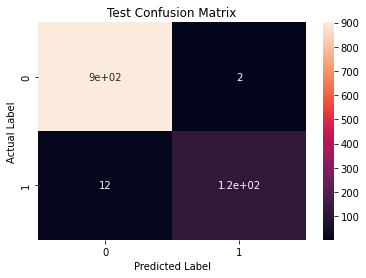

In [ ]:
# XGB + TFIDF
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_TFIDF , y_train)
y_train_pred = rfc.predict(X_train_TFIDF)
y_test_pred = rfc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : ",accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


Extra Trees Classifier

Train Accuracy :  1.0
test_Accuracy :  0.9903288201160542
Train Precision :  1.0
Test Precision :  0.991869918699187
Train F1-score : 1.0
Test F1-score : 0.9606299212598425


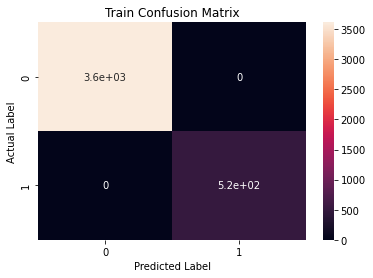

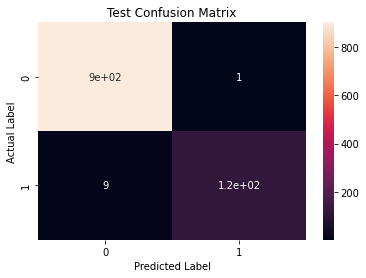

In [ ]:
# Extra Trees Classifer + BOW
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_BOW,y_train)
y_train_pred = etc.predict(X_train_BOW)
y_test_pred = etc.predict(X_test_BOW)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  1.0
test_Accuracy :  0.9854932301740812
Train Precision :  1.0
Test Precision :  1.0
Train F1-score : 1.0
Test F1-score : 0.9392712550607287


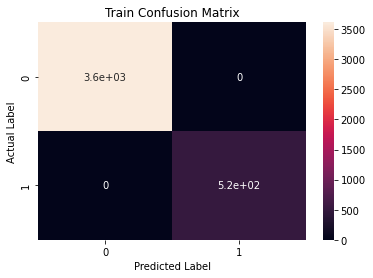

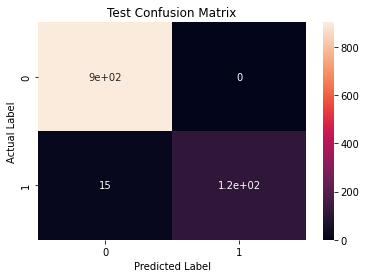

In [ ]:
# Extra Trees Classifer + BOW(ngram range = (1,2))
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_BOW_2,y_train)
y_train_pred = etc.predict(X_train_BOW_2)
y_test_pred = etc.predict(X_test_BOW_2)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Train Accuracy :  1.0
test_Accuracy :  0.9893617021276596
Train Precision :  1.0
Test Precision :  0.9838709677419355
Train F1-score : 1.0
Test F1-score : 0.9568627450980393


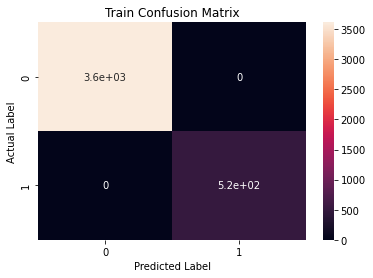

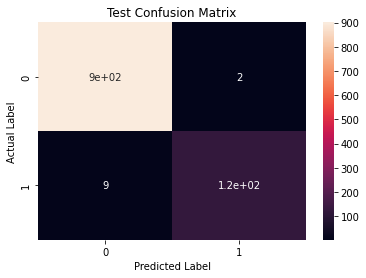

In [42]:
# Extra Trees Classifer + TFIDF
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_TFIDF,y_train)
y_train_pred = etc.predict(X_train_TFIDF)
y_test_pred = etc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Modelling on Balanced Dataset

In [ ]:
# Balancing dataset
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
# The dataset is imbalanced
# Random oversampling duplicates examples from the minority class in the training dataset
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.93)
X_new,y_new=os.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.93 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
print(X_new.shape)
print(y_new.shape)

(8715, 10)
(8715,)


In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.22,random_state=2,stratify = y_new )

In [ ]:
# Tfidf Vectorizer
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit(X_train['preprocessed_text'].values.astype('U'))
X_train_tfidf = tfidf_vec.transform(X_train['preprocessed_text'].values.astype('U'))
X_test_tfidf = tfidf_vec.transform(X_test['preprocessed_text'].values.astype('U'))

In [ ]:
# Tfidf + Numerical features
X_train_TFIDF= hstack([X_train_tfidf,X_train['preprocessed_length'].values.reshape(-1,1),X_train['digits_count'].values.reshape(-1,1)]).toarray()
X_test_TFIDF = hstack([X_test_tfidf,X_test['preprocessed_length'].values.reshape(-1,1),X_test['digits_count'].values.reshape(-1,1)]).toarray()
print(X_train_TFIDF.shape)
print(X_test_TFIDF.shape)

(6797, 5993)
(1918, 5993)


Train Accuracy :  1.0
test_Accuracy :  0.9994786235662148
Train Precision :  1.0
Test Precision :  0.9989189189189189
Train F1-score : 1.0
Test F1-score : 0.9994591671173607


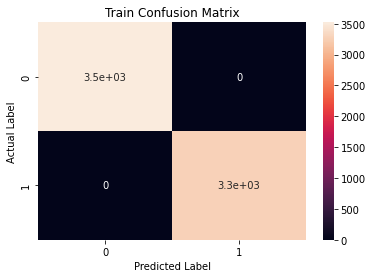

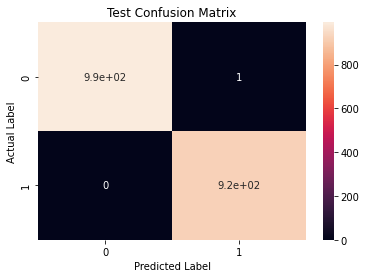

In [ ]:
# Extra Trees Classifer + TFIDF(with balanced dataset)
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_TFIDF,y_train)
y_train_pred = etc.predict(X_train_TFIDF)
y_test_pred = etc.predict(X_test_TFIDF)
print("Train Accuracy : ",accuracy_score(y_train,y_train_pred))
print("test_Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Train Precision : ",precision_score(y_train,y_train_pred))
print("Test Precision : ",precision_score(y_test,y_test_pred))
print("Train F1-score :",f1_score(y_train , y_train_pred))
print("Test F1-score :",f1_score(y_test,y_test_pred))
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(train_cm , annot = True)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
sns.heatmap(test_cm, annot = True)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Prediction

In [45]:
import base64
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import re

import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from scipy.sparse import hstack
ps = PorterStemmer()
def data_preprocessing(text):
    '''
    Function to prepreocess and clean the data
    '''

    # lowercasing the text
    text = text.lower()

    # Expanding Contractions(Decontractions)
    def decontracted(text):
        '''
        Function to expand the contractions
        '''
        # specific
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can\'t", "can not", text)

        # general
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        return text
    text = decontracted(text)

    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # remove punctuation and special characters
    def remove_punctuation(text):
        '''
        Function to remove special character and punctuation from text
        '''
        text = nltk.word_tokenize(text)
        lst = []
        for i in text:
            if i not in string.punctuation:
                lst.append(i)
        text = lst[:]
        return ' '.join(lst)
    text = remove_punctuation(text)

    # remove stopwords
    def remove_stopwords(text):
        '''
        Function to rmove stopwords from a given text
        '''
        lst = []
        for char in text.split():
            if char not in stopwords.words('english'):
                lst.append(char)
        return ' '.join(lst)

    text = remove_stopwords(text)

    # remove digits
    def remove_digits(text):
        '''
        Fuction to remove digits from a given text
        '''
        lst = []
        for char in text:
            if not char.isdigit():
                lst.append(char)
        return ''.join(lst)
    text = remove_digits(text)

    # remove everything except alphabet
    text = re.sub(r'[^a-zA-Z ]+', '', text)

    # remove extra spaces from the text
    text = re.sub(' +', ' ', text)

    # Stemming
    text = ' '.join(ps.stem(word) for word in text.split(' '))

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
  # Prediction 
  msg = input("Enter the Message : ")
  print("Message : {}".format(msg))
  preprocessed_message = data_preprocessing(msg)
  vectorizer = tfidf_vec.transform([preprocessed_message])
  def digits_count(string):
        '''
        Function to compute number of digits in a given text
        '''
        digit_count = 0
        for i in range(len(string)):
            if (string[i].isalpha()):
                continue
            elif (string[i].isdigit()):
                digit_count += 1
            elif (string[i] == ' '):
                continue
            else:
                continue
        return digit_count

  length = len(preprocessed_message)
  digits = digits_count(msg)
  features = hstack([vectorizer,length,digits]).toarray()
  result = etc.predict(features)[0]
  probability_spam = etc.predict_proba(features)[0][1]
  probability_ham = etc.predict_proba(features)[0][0]

  if result == 0:
    print("This is NOT a spam message")
    print("probability of ham : {}",probability_ham)
  else:
    print("This is the SPAM message")
    print("Probability of spam : ", probability_spam)

Enter the Message : congratulations you won 20k call to claim your money
Message : congratulations you won 20k call to claim your money
This is the SPAM message
Probability of spam :  0.59


In [54]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Classifier", "Data", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision","Train F1-score", "Test F1-score"])
  
# Add rows
myTable.add_row(["Gaussian Naive Bayes","Numerical Features + BOW" ,"0.9315", "0.8820", "0.6484", "0.5198","0.7867","0.6592"])
myTable.add_row(["Gaussian Naive Bayes","Numerical Features + BOW(Bi-gram)","0.9859","0.9284", "0.9", "0.6401","0.9473","0.7730",])
myTable.add_row(["Gaussian Naive Bayes", "Numrical Features + TFIDF", "0.9339", "0.8839","0.6566","0.5246","0.7927","0.6610"])
myTable.add_row(["Multinomial Naive Bayes", "Numerical Features + BOW", "0.9862", "0.9845","0.9567","0.9457","0.9447","0.9384"])
myTable.add_row(["Multinomial Naive Bayes", "Numerical Features + BOW(Bi-gram)", "0.9912", "0.9806","0.9821","0.9586","0.9649","0.9206"])
myTable.add_row(["Multinomial Naive Bayes","Numerical Features + TFIDF" ,"0.9685", "0.9748", "0.9100", "0.9411","0.87","0.896"])
myTable.add_row(["Bernoulli Naive Bayes", "Numerical Features + BOW", "0.9828", "0.9806","0.9870","1.0","0.9279","0.9173"])
myTable.add_row(["Bernoulli Naive Bayes", "Numerical Features + BOW(Bi-gram)", "0.9567", "0.9245","0.9803","1.0","0.7963","0.5760"])
myTable.add_row(["Bernoulli Naive Bayes","Numerical Features + TFIDF" ,"0.9828", "0.9806", "0.9870", "1.0","0.9279","0.9173"])
myTable.add_row(["Logistic Regression", "Numerical Features + BOW", "0.9552", "0.9574","0.9884","0.9780","0.7866","0.8018"])
myTable.add_row(["Logistic Regression", "Numerical Features + BOW(Bi-gram)", "0.9748", "0.9738","0.9644","0.9561","0.8930","0.8897"])
myTable.add_row(["Logistic Regression","Numerical Features + TFIDF" ,"0.9579", "0.9593", "0.7939", "0.7870","0.8438","0.8531"])
myTable.add_row(["SVM", "Numerical Features + BOW", "0.9615", "0.9661","0.9892","0.9897","0.8219","0.8471"])
myTable.add_row(["SVM", "Numerical Features + BOW(Bi-gram)", "0.9615", "0.9661","0.9892","0.9897","0.8219","0.8471"])
myTable.add_row(["SVM","Numerical Features + TFIDF" ,"0.9613", "0.9661", "0.9865", "0.9897","0.8210","0.8471"])
myTable.add_row(["KNN", "Numerical Features + BOW", "0.9782", "0.9787","0.9556","0.9430","0.9096","0.9133"])
myTable.add_row(["KNN", "Numerical Features + BOW(Bi-gram)", "0.9792", "0.9796","0.9560","0.9365","0.9139","0.9182"])
myTable.add_row(["KNN","Numerical Features + TFIDF" ,"0.9779", "0.9748", "0.9614", "0.9411","0.9079","0.8960"])
myTable.add_row(["Random Forest", "Numerical Features + BOW", "1.0", "0.9893","1.0","0.9838","1.0","0.9568"])
myTable.add_row(["Random Forest", "Numerical Features + BOW(Bi-gram)", "1.0", "0.9874","1.0","0.9916","1.0","0.9482"])
myTable.add_row(["Random Forest","Numerical Features + TFIDF" ,"1.0", "0.9864", "1.0", "0.9834","1.0","0.9444"])
myTable.add_row(["XG Boost", "Numerical Features + BOW", "0.9850", "0.9854","0.9831","0.9754","0.9378","0.9407"])
myTable.add_row(["XG Boost", "Numerical Features + BOW(Bi-gram)", "0.9850", "0.9854","0.9831","0.9754","0.9378","0.9407"])
myTable.add_row(["XG Boost","Numerical Features + TFIDF" ,"1.0", "0.9864", "1.0", "0.9834","1.0","0.9444"])
myTable.add_row(["Extra Tree Classifier", "Numerical Features + BOW", "1.0", "0.9903","1.0","0.9918","1.0","0.9606"])
myTable.add_row(["Extra Tree Classifier", "Numerical Features + BOW(Bi-gram)", "1.0", "0.9854","1.0","1.0","1.0","0.9392"])
myTable.add_row(["Extra Tree Classifier","Numerical Features + TFIDF" ,"1.0", "0.9912", "1.0", "0.9919","1.0","0.9647"])
myTable.add_row(["Extra Tree Classifier","Numerical Features + TFIDF(with balanced dataset)" ,"1.0", "0.9994", "1.0", "0.9989","1.0","0.9994"])


print(myTable)


+-------------------------+---------------------------------------------------+----------------+---------------+-----------------+----------------+----------------+---------------+
|        Classifier       |                        Data                       | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train F1-score | Test F1-score |
+-------------------------+---------------------------------------------------+----------------+---------------+-----------------+----------------+----------------+---------------+
|   Gaussian Naive Bayes  |              Numerical Features + BOW             |     0.9315     |     0.8820    |      0.6484     |     0.5198     |     0.7867     |     0.6592    |
|   Gaussian Naive Bayes  |         Numerical Features + BOW(Bi-gram)         |     0.9859     |     0.9284    |       0.9       |     0.6401     |     0.9473     |     0.7730    |
|   Gaussian Naive Bayes  |             Numrical Features + TFIDF             |     0.9339     

We can clearly see that Extra Tree Classifier with TFIDF Vectorizer performs better than any other model

In [ ]:
import pickle
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))

In [ ]:
from google.colab import files
files.download('model.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('vectorizer.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>